<a href="https://colab.research.google.com/github/AIREheart/Computational-Neuroscience/blob/main/syde552_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SYDE 552 Assignment 4: Basal Ganglia
### Due Monday, April 8, 11:59pm
### Value: 15% of total marks for the course

### Aaisha Ameen
### 20854135



This assignment covers various forms of Action Selection, covering a standard feed-forward neural network model and a winner-take-all model.  The last section adds biological details to the winner-take-all model (synapses).  The intent is to show the creation a modification of small specific-purpose networks and to explore how timing affects neurons.

You can work in groups to do the assignment, but your answers and code must be original to you. Your submission will be a filled-out copy of this notebook (cells for code and written answers provided).

# 1. Action Selection with Feed-forward Neural Networks

In order for the brain to choose which of many possible actions to select to perform at any given moment, it needs to be able to takke a list of numbers (indicating how good each action is in the current state, sometimes called the Value) and create an output that indicates which one is the largest.  For example, with the input `[0.2, 0.5, 0.8, 0.3]` we might want the output `[0, 0, 1, 0]`.  

One way to approach this task is to train a normal feed-forward neural network on this task.  This would be similar to the digit recognition task from Assignment 2, except we would just have the list of values as input instead of the image.

To create the dataset for training the network, we can just generate a random set of values between 0 and 1, and then compute which one is biggest to produce our target value.

In [ ]:
import numpy as np

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)


print(X)
print(Y)

[[0.10865526 0.32199107 0.0877714  0.60104092]
 [0.82881576 0.53043939 0.32393773 0.81628972]
 [0.77922635 0.54754253 0.52764832 0.4146324 ]
 ...
 [0.43950921 0.84329838 0.28674471 0.20383928]
 [0.3775138  0.40880528 0.26450667 0.8570831 ]
 [0.37196567 0.15757774 0.76174617 0.27498704]]
[3 0 0 ... 1 3 2]


In order to train with this data in pytorch, we need to turn that array into a pytorch dataset, and to split it into training and testing.


In [ ]:
import matplotlib as plt
from matplotlib import pyplot as plt

import torch
dataset = torch.utils.data.TensorDataset(torch.Tensor(X),torch.Tensor(Y).long()) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)


Now we have to define our network.  Here we define a simple neural network with 4 inputs, a hidden layer of 100 neurons, and 4 outputs.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 100)    # the weights from the input to the new learned features (hidden layer)
        #self.fc2 = nn.Linear(100, 500)    # second hidden layer
        self.fc2 = nn.Linear(100, 4)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        #x = F.sigmoid(self.fc2(x))         #adding neuron model to second layer
        #x = self.fc3(x)
        return x

network = Net()

Finally, we have to train the model.  Here is the exact same code from Assignemnt 2 for training


In [ ]:
# create the learning rule
optimizer = torch.optim.SGD(network.parameters(),
                            lr=0.1,   # learning rate
                            momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule

            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)

    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


**1. a) [1 mark]** Call `continue_training()` 10 times and then plot the training and testing accuracy (as you did in assignment 2 question 3a.

Iteration 1 Training accuracy: 0.2553749978542328
Iteration 1 Testing accuracy: 0.2460000067949295
Iteration 2 Training accuracy: 0.2553749978542328
Iteration 2 Testing accuracy: 0.2460000067949295
Iteration 3 Training accuracy: 0.24962499737739563
Iteration 3 Testing accuracy: 0.2460000067949295
Iteration 4 Training accuracy: 0.2553749978542328
Iteration 4 Testing accuracy: 0.2460000067949295
Iteration 5 Training accuracy: 0.25
Iteration 5 Testing accuracy: 0.26249998807907104
Iteration 6 Training accuracy: 0.25
Iteration 6 Testing accuracy: 0.26249998807907104
Iteration 7 Training accuracy: 0.25
Iteration 7 Testing accuracy: 0.26249998807907104
Iteration 8 Training accuracy: 0.25
Iteration 8 Testing accuracy: 0.26249998807907104
Iteration 9 Training accuracy: 0.25
Iteration 9 Testing accuracy: 0.26249998807907104
Iteration 10 Training accuracy: 0.25
Iteration 10 Testing accuracy: 0.26249998807907104


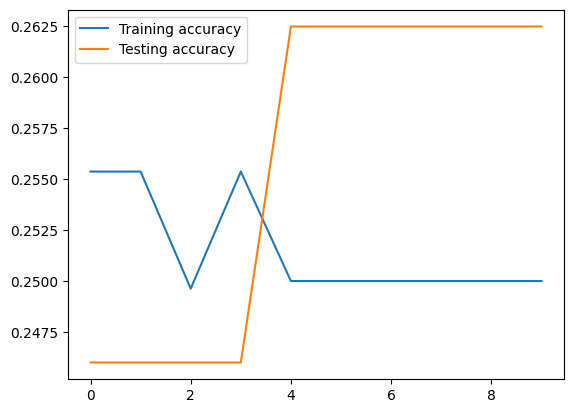

In [ ]:
import matplotlib as plt
from matplotlib import pyplot as plt

for i in range(10):
    continue_training()

plt.plot(range(10), accuracy_train, label = 'Training accuracy')
plt.plot(range(10), accuracy_test, label = 'Testing accuracy')
plt.legend()

**1. b) [1 mark]** In the previous question, the model did not get a very high accuracy.  To try to improve the accuracy, let's vary the number of neurons.  Try using 200 neurons, 500 neurons, and 1000 neurons.  For each one, generate the same plot as in 1a.  Does making the network larger in this way improve performance significantly?

Iteration 1 Training accuracy: 0.24562500417232513
Iteration 1 Testing accuracy: 0.2549999952316284
Iteration 2 Training accuracy: 0.24562500417232513
Iteration 2 Testing accuracy: 0.2549999952316284
Iteration 3 Training accuracy: 0.24562500417232513
Iteration 3 Testing accuracy: 0.2549999952316284
Iteration 4 Training accuracy: 0.24562500417232513
Iteration 4 Testing accuracy: 0.2549999952316284
Iteration 5 Training accuracy: 0.24562500417232513
Iteration 5 Testing accuracy: 0.2549999952316284
Iteration 6 Training accuracy: 0.24562500417232513
Iteration 6 Testing accuracy: 0.2549999952316284
Iteration 7 Training accuracy: 0.24562500417232513
Iteration 7 Testing accuracy: 0.2549999952316284
Iteration 8 Training accuracy: 0.24562500417232513
Iteration 8 Testing accuracy: 0.2549999952316284
Iteration 9 Training accuracy: 0.24562500417232513
Iteration 9 Testing accuracy: 0.2549999952316284
Iteration 10 Training accuracy: 0.24562500417232513
Iteration 10 Testing accuracy: 0.254999995231628

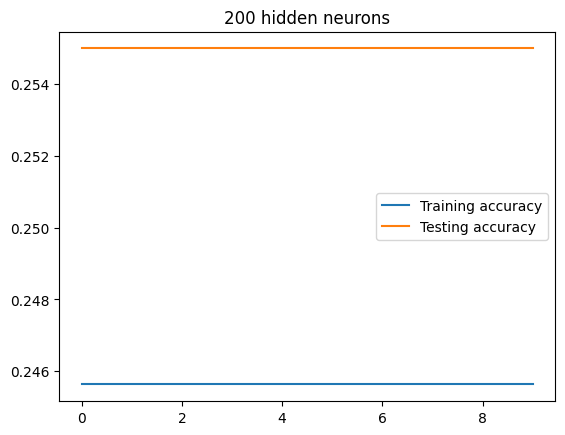

In [ ]:
#200 hidden nuerons
# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

network = Net()


for i in range(10):
    continue_training()

plt.plot(range(10), accuracy_train, label = 'Training accuracy')
plt.plot(range(10), accuracy_test, label = 'Testing accuracy')
plt.title('200 hidden neurons')
plt.legend()


Iteration 1 Training accuracy: 0.24562500417232513
Iteration 1 Testing accuracy: 0.2554999887943268
Iteration 2 Training accuracy: 0.24562500417232513
Iteration 2 Testing accuracy: 0.2554999887943268
Iteration 3 Training accuracy: 0.24562500417232513
Iteration 3 Testing accuracy: 0.2554999887943268
Iteration 4 Training accuracy: 0.24562500417232513
Iteration 4 Testing accuracy: 0.2554999887943268
Iteration 5 Training accuracy: 0.24562500417232513
Iteration 5 Testing accuracy: 0.2554999887943268
Iteration 6 Training accuracy: 0.24562500417232513
Iteration 6 Testing accuracy: 0.2554999887943268
Iteration 7 Training accuracy: 0.24562500417232513
Iteration 7 Testing accuracy: 0.2554999887943268
Iteration 8 Training accuracy: 0.24562500417232513
Iteration 8 Testing accuracy: 0.2554999887943268
Iteration 9 Training accuracy: 0.24562500417232513
Iteration 9 Testing accuracy: 0.2554999887943268
Iteration 10 Training accuracy: 0.24562500417232513
Iteration 10 Testing accuracy: 0.255499988794326

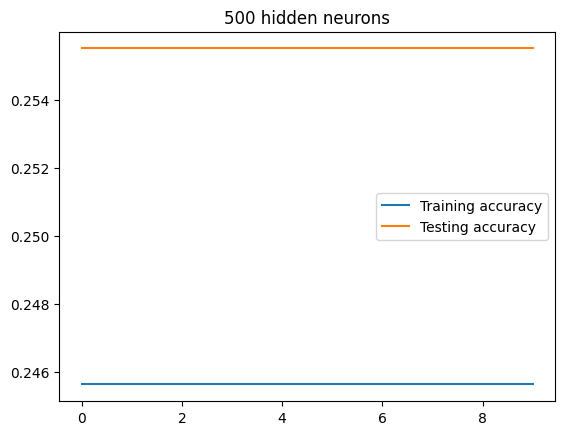

In [ ]:
#500 hidden neurons

accuracy_train = []
accuracy_test = []

network = Net()


for i in range(10):
    continue_training()

plt.plot(range(10), accuracy_train, label = 'Training accuracy')
plt.plot(range(10), accuracy_test, label = 'Testing accuracy')
plt.title('500 hidden neurons')
plt.legend()

Iteration 1 Training accuracy: 0.2542499899864197
Iteration 1 Testing accuracy: 0.24950000643730164
Iteration 2 Training accuracy: 0.2542499899864197
Iteration 2 Testing accuracy: 0.24950000643730164
Iteration 3 Training accuracy: 0.2542499899864197
Iteration 3 Testing accuracy: 0.24950000643730164
Iteration 4 Training accuracy: 0.2542499899864197
Iteration 4 Testing accuracy: 0.24950000643730164
Iteration 5 Training accuracy: 0.2542499899864197
Iteration 5 Testing accuracy: 0.24950000643730164
Iteration 6 Training accuracy: 0.2542499899864197
Iteration 6 Testing accuracy: 0.24950000643730164
Iteration 7 Training accuracy: 0.2542499899864197
Iteration 7 Testing accuracy: 0.24950000643730164
Iteration 8 Training accuracy: 0.2542499899864197
Iteration 8 Testing accuracy: 0.24950000643730164
Iteration 9 Training accuracy: 0.2542499899864197
Iteration 9 Testing accuracy: 0.24950000643730164
Iteration 10 Training accuracy: 0.2542499899864197
Iteration 10 Testing accuracy: 0.2495000064373016

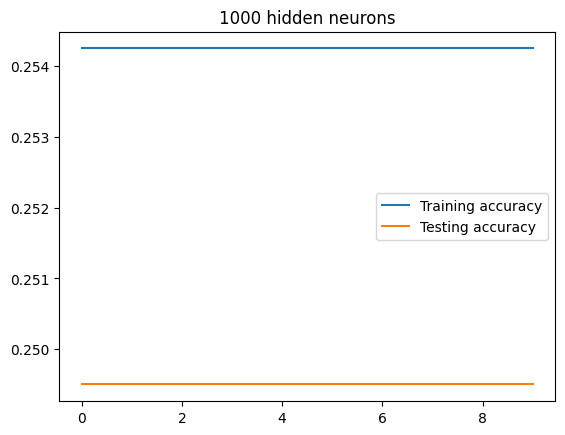

In [ ]:
#1000 hidden neurons
accuracy_train = []
accuracy_test = []

network = Net()


for i in range(10):
    continue_training()

plt.plot(range(10), accuracy_train, label = 'Training accuracy')
plt.plot(range(10), accuracy_test, label = 'Testing accuracy')
plt.title('1000 hidden neurons')
plt.legend()

**1. c) [1 mark]** Try making the network deeper by adding a second layer of neurons.  Use 500 neurons in each of the two middle layers.  Generate the same plot as in 1a.  Does making the network larger in this way improve performance significantly?

Iteration 1 Training accuracy: 0.35212498903274536
Iteration 1 Testing accuracy: 0.3504999876022339
Iteration 2 Training accuracy: 0.35212498903274536
Iteration 2 Testing accuracy: 0.3504999876022339
Iteration 3 Training accuracy: 0.35212498903274536
Iteration 3 Testing accuracy: 0.3504999876022339
Iteration 4 Training accuracy: 0.35212498903274536
Iteration 4 Testing accuracy: 0.3504999876022339
Iteration 5 Training accuracy: 0.35212498903274536
Iteration 5 Testing accuracy: 0.3504999876022339
Iteration 6 Training accuracy: 0.35212498903274536
Iteration 6 Testing accuracy: 0.3504999876022339
Iteration 7 Training accuracy: 0.35212498903274536
Iteration 7 Testing accuracy: 0.3504999876022339
Iteration 8 Training accuracy: 0.35212498903274536
Iteration 8 Testing accuracy: 0.3504999876022339
Iteration 9 Training accuracy: 0.35212498903274536
Iteration 9 Testing accuracy: 0.3504999876022339
Iteration 10 Training accuracy: 0.35212498903274536
Iteration 10 Testing accuracy: 0.350499987602233

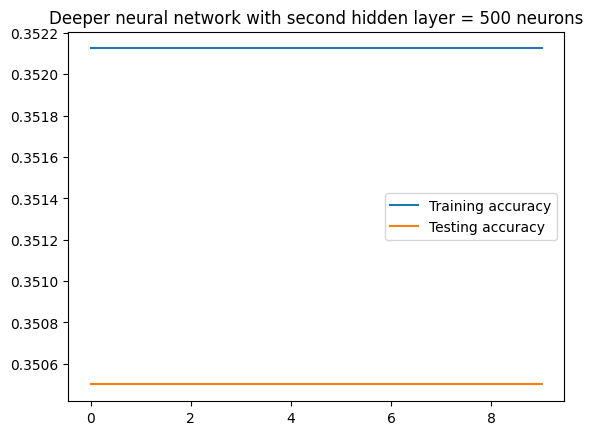

In [ ]:
#500 hidden neurons in 2nd hidden layer
accuracy_train = []
accuracy_test = []

network = Net()


for i in range(10):
    continue_training()

plt.plot(range(10), accuracy_train, label = 'Training accuracy')
plt.plot(range(10), accuracy_test, label = 'Testing accuracy')
plt.title('Deeper neural network with second hidden layer = 500 neurons')
plt.legend()

**1. d) [1 mark]** Starting with the original model in question 1a, let's modify the network in a different way.  In particular, in the current version of the model we have no neuron model at the output.  This is due to this part of the code:

```python
    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return x
```

For the first line (the hidden layer), we use a Rectified Linear neuron model (`F.relu`).  But we aren't doing that with the second line, where it creates the output.  Let's try adding a neuron model there by changing `x = self.fc2(x)` to `x = F.relu(self.fc2(x))`.

Train the model again (by calling `continue_training` 10 times) and make the same plot as above.  Does this improve performance significantly?

Iteration 1 Training accuracy: 0.250124990940094
Iteration 1 Testing accuracy: 0.24449999630451202
Iteration 2 Training accuracy: 0.250124990940094
Iteration 2 Testing accuracy: 0.24449999630451202
Iteration 3 Training accuracy: 0.250124990940094
Iteration 3 Testing accuracy: 0.24449999630451202
Iteration 4 Training accuracy: 0.250124990940094
Iteration 4 Testing accuracy: 0.24449999630451202
Iteration 5 Training accuracy: 0.250124990940094
Iteration 5 Testing accuracy: 0.24449999630451202
Iteration 6 Training accuracy: 0.250124990940094
Iteration 6 Testing accuracy: 0.24449999630451202
Iteration 7 Training accuracy: 0.250124990940094
Iteration 7 Testing accuracy: 0.24449999630451202
Iteration 8 Training accuracy: 0.250124990940094
Iteration 8 Testing accuracy: 0.24449999630451202
Iteration 9 Training accuracy: 0.250124990940094
Iteration 9 Testing accuracy: 0.24449999630451202
Iteration 10 Training accuracy: 0.250124990940094
Iteration 10 Testing accuracy: 0.24449999630451202


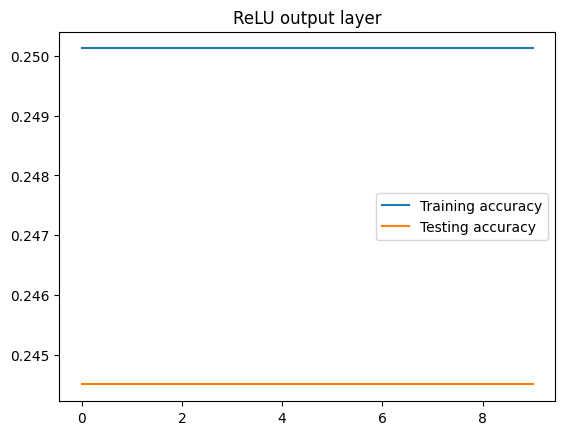

In [ ]:
#ReLU in output layer
accuracy_train = []
accuracy_test = []

#network = Net()


for i in range(10):
    continue_training()

plt.plot(range(10), accuracy_train, label = 'Training accuracy')
plt.plot(range(10), accuracy_test, label = 'Testing accuracy')
plt.title('ReLU output layer')
plt.legend()

#There is not significant improvement in performance

**1. e) [1 mark]** Repeat 1.d but use `F.sigmoid` instead of `F.relu` for the output.  Plot the same graph as before.  You should see that this change makes an improvement over the results in the previous questions.  Why is this the case?

Iteration 1 Training accuracy: 0.32074999809265137
Iteration 1 Testing accuracy: 0.3255000114440918
Iteration 2 Training accuracy: 0.32074999809265137
Iteration 2 Testing accuracy: 0.3255000114440918
Iteration 3 Training accuracy: 0.32074999809265137
Iteration 3 Testing accuracy: 0.3255000114440918
Iteration 4 Training accuracy: 0.32074999809265137
Iteration 4 Testing accuracy: 0.3255000114440918
Iteration 5 Training accuracy: 0.32074999809265137
Iteration 5 Testing accuracy: 0.3255000114440918
Iteration 6 Training accuracy: 0.32074999809265137
Iteration 6 Testing accuracy: 0.3255000114440918
Iteration 7 Training accuracy: 0.32074999809265137
Iteration 7 Testing accuracy: 0.3255000114440918
Iteration 8 Training accuracy: 0.32074999809265137
Iteration 8 Testing accuracy: 0.3255000114440918
Iteration 9 Training accuracy: 0.32074999809265137
Iteration 9 Testing accuracy: 0.3255000114440918
Iteration 10 Training accuracy: 0.32074999809265137
Iteration 10 Testing accuracy: 0.325500011444091

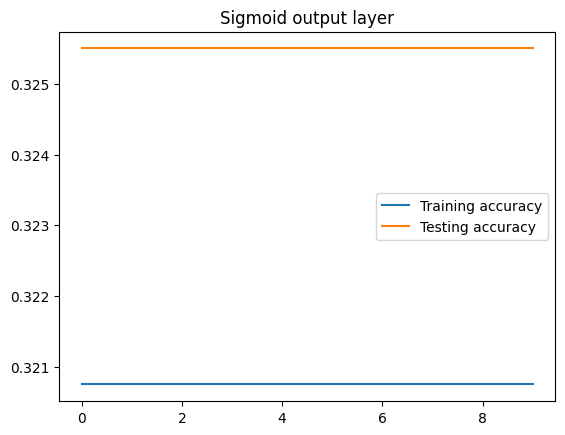

In [ ]:
#sigmoid in output layer
accuracy_train = []
accuracy_test = []

network = Net()


for i in range(10):
    continue_training()

plt.plot(range(10), accuracy_train, label = 'Training accuracy')
plt.plot(range(10), accuracy_test, label = 'Testing accuracy')
plt.title('Sigmoid output layer')
plt.legend()

Sigmoid performs better than ReLU as an activation function because of its increased overall smoothness which can better represent the confidences describing each possible choice. With outputs between 0 and 1, the sigmoid function can also correlate to the overall probability of selection based on maximal benefit. ReLU, on the other hand, is only active in neurons receiving positive inputs since it has an output of 0 for all negative values.
Interestingly, I learned that for positive outputs, activation functions with diminishing gradients (such as sigmoid, hyperbolic functions and even softmax) can lead to something called the vanishing gradient problem where weights are updated even more slowly during backpropogation over time due to their near-zero gradients, so ReLU does seem like the more optimal choice in certain cases for learning when considering other aspects such as the depth of the network and connections.

**1. f) [1 mark]** Try replacing the `F.sigmoid` with `F.softmax`.  The softmax function will scale up the largest value while scaling down the smaller values.  Repeat the previous question and plot the same graph.  You should see an even bigger improvement.  Why is this the case?  

<ipython-input-3-1b2b1f267776>:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))         #adding neuron model to second layer


Iteration 1 Training accuracy: 0.5605000257492065
Iteration 1 Testing accuracy: 0.5845000147819519
Iteration 2 Training accuracy: 0.8215000033378601
Iteration 2 Testing accuracy: 0.8399999737739563
Iteration 3 Training accuracy: 0.9419999718666077
Iteration 3 Testing accuracy: 0.9430000185966492
Iteration 4 Training accuracy: 0.9661250114440918
Iteration 4 Testing accuracy: 0.9660000205039978
Iteration 5 Training accuracy: 0.9747499823570251
Iteration 5 Testing accuracy: 0.9775000214576721
Iteration 6 Training accuracy: 0.9817500114440918
Iteration 6 Testing accuracy: 0.984000027179718
Iteration 7 Training accuracy: 0.9868749976158142
Iteration 7 Testing accuracy: 0.9879999756813049
Iteration 8 Training accuracy: 0.9881250262260437
Iteration 8 Testing accuracy: 0.9890000224113464
Iteration 9 Training accuracy: 0.9906250238418579
Iteration 9 Testing accuracy: 0.9894999861717224
Iteration 10 Training accuracy: 0.9904999732971191
Iteration 10 Testing accuracy: 0.9904999732971191


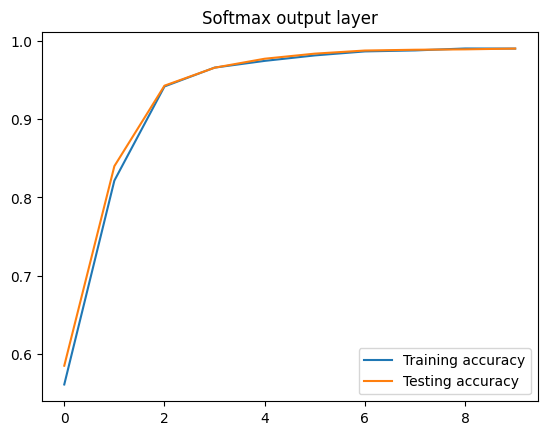

In [ ]:
#softmax in output layer
accuracy_train = []
accuracy_test = []

#network = Net()


for i in range(10):
    continue_training()

plt.plot(range(10), accuracy_train, label = 'Training accuracy')
plt.plot(range(10), accuracy_test, label = 'Testing accuracy')
plt.title('Softmax output layer')
plt.legend()

Softmax functions trump sigmoids in the sense that softmax can handle multiple classes of outputs, and having them be normalized for all outputs to sum to 1 naturally leans into probablistic interpretations. This leads to an even better learning protocol when tasked with classifying between multiple labels (choices) such as in action selection problems.

**1. g) [1 mark]** Even though the model you built in 1f) does a good job of solving the task of producing the correct output, it seems to do this only if we include a `softmax` operation.  How might this be considered "cheating" (and thus this should not considered to be a good model of action selection in the brain)?

Softmax can be considered as cheating and not fully biologically-plasuible due to its underlying mechanisms that are solely-focused on optimization not necessarily aligning with how the basal ganglia arrive at a conclusion to pursue an action (by cessation of the inhibition of those connections within that circuit/pathway). We don't know if those connections are looked at and evaluated as some amount of probability, especially if we don't know the total number of options one may be selecting between or aware of. Furthermore, brains may not select the same choice every time and so without allowing for some context-dependency in the softmax-driven model, it is hard to say whether using this function will allow for flexibility in choice or the degree of generalization that the brain truly requires.

# 2. Action Selection with Winner-Take-All

Given the results of the previous section, we need a different approach to do action selection.  Since a feed-forward approach led to difficulties, here we will explore a recurrent network: the standard "winner-take-all" circuit.  In this system, each neuron excites itself but inhibits the other neurons.

Crucially, since this approach is recurrent, we can't just feed in an input and get an output.  Instead, we will feed in an input over time and see what the output is over time.  Rather than implement this in `pytorch`, we will just use normal numpy commands.

The main configurable part of the model is how nuch the neurons excite themselves and how much they inhibit other neurons.  We can build this as a weight matrix that has the excitation on the diagonal and the inhibition everywhere else:


In [ ]:
w = np.zeros((N,N))
w[:] = -0.9   # set the inhibition amount everywhere
for i in range(N):
    w[i,i] = 1   # set the excitatory connection

print(w)


[[ 1.  -0.9 -0.9 -0.9]
 [-0.9  1.  -0.9 -0.9]
 [-0.9 -0.9  1.  -0.9]
 [-0.9 -0.9 -0.9  1. ]]


To run the model, we pick a particular input that set that we will provide.  We then feed that value into the model, and add the value that the neurons send back to themselves.  We also include a `clip` operation that stops the neuron value from going below 0 or above 1.  We repeat this process multiple times, and we record the activity of the neurons so we can plot it afterwards.

In [ ]:
record = []                   # for recording the activity values
activity = np.zeros(N)        # neurons are not active initially
for i in range(10):
    # the new neuron value is the old value times the weight matrix (for the neurons
    #  inhibiting and exciting each other), plus the input benig added.
    # we also clip the neurons so their activity doesn't go below 0 or above 1
    activity = np.clip(input_values + w @ activity, 0, 1)
    record.append(activity)

TypeError: unsupported operand type(s) for @: 'numpy.ndarray' and 'Tensor'

**2. a) [1 mark]**  Run the model with an input of `[0.7, 0.8, 0.4, 0.3]`.  Plot the `record` of the activity.  Print the final `activity` value.  Does the network successfully output the desired correct results of `[0, 1, 0, 0]`?

[array([0.7, 0.8, 0.4, 0.3]), array([0.05, 0.34, 0.  , 0.  ]), array([0.444, 1.   , 0.049, 0.   ]), array([0.1999, 1.    , 0.    , 0.    ]), array([0., 1., 0., 0.]), array([0., 1., 0., 0.]), array([0., 1., 0., 0.]), array([0., 1., 0., 0.]), array([0., 1., 0., 0.]), array([0., 1., 0., 0.])]


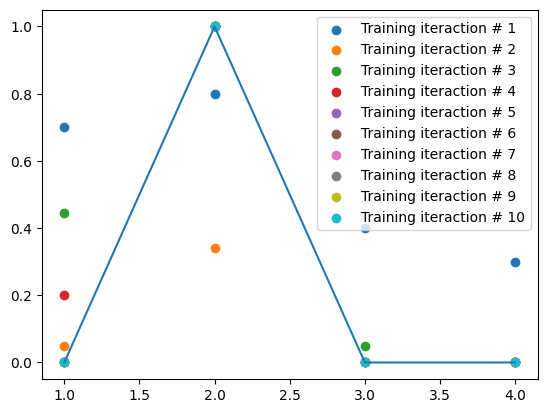

In [ ]:
import matplotlib as plt
from matplotlib import pyplot as plt

input_values = [0.7, 0.8, 0.4, 0.3]


record = []                   # for recording the activity values
activity = np.zeros(N)        # neurons are not active initially
for i in range(10):
    # the new neuron value is the old value times the weight matrix (for the neurons
    #  inhibiting and exciting each other), plus the input benig added.
    # we also clip the neurons so their activity doesn't go below 0 or above 1
    activity = np.clip(input_values + w @ activity, 0, 1)
    record.append(activity)

print(record)
for i in range(10):
    plt.scatter([1,2,3,4], record[i], label = 'Training iteraction # ' + str(i+1))

    plt.legend()
plt.plot([1,2,3,4], record[9])

**2. b) [1 mark]**  Test the model using all the data in the `X` dataset you created in question 1.  (This should be all 10000 sets of 4 randomly generated numbers).  Note that since we didn't use any data to train the model, we are using all of it to test the model.

To test the model, loop through all the items (`for input_values in X:`) and run the model as in question 2a.  To determine if the output is correct, you can do

```python
    target = np.zeros(N)
    target[np.argmax(input_values)] = 1
    if np.all(target == activity):
        correct += 1
```

What proportion of the time does the model produce the correct output?

tensor([0.9571, 0.2983, 0.6578, 0.9016])
tensor([0.1886, 0.3210, 0.1974, 0.9618])
tensor([0.5886, 0.3885, 0.9820, 0.6171])
tensor([0.3289, 0.3162, 0.1112, 0.9631])


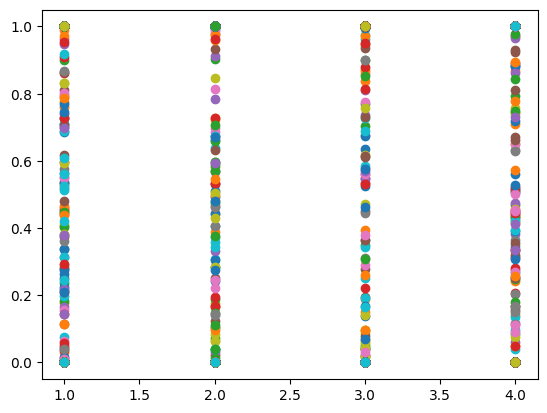

In [ ]:
X = dataset[:][0]
print(X[0])
print(X[1])
print(X[2])

print(X[9999])

correct = 0
count1 = 0
count2 = 0

for input_values in X:
    count1+=1

    #print(1)
    #print(input_values)
    record = []                   # for recording the activity values
    activity = np.zeros(N)        # neurons are not active initially

    for i in range(20):
          #print(input_values)#[i].numpy())#[i])
          # the new neuron value is the old value times the weight matrix (for the neurons
          #  inhibiting and exciting each other), plus the input benig added.
          # we also clip the neurons so their activity doesn't go below 0 or above 1

          activity = np.clip(input_values.numpy() + w @ activity, 0, 1)
          record.append(activity)
    target = np.zeros(N)
    target[np.argmax(input_values)] = 1
    if np.all(target == activity):
      correct += 1
    count2+=1
   # print(record[9])
   # print(target)


    plt.scatter([1,2,3,4], record[i], label = 'Training iteraction # ' + str(i+1))

   # for i in range(10):
    #    plt.scatter([1,2,3,4], record[i], label = 'Training iteraction # ' + str(i+1))


In [ ]:
print(correct)
print(count1)
print(count2)
print(correct/10000)

Y = X[:] #gives the whole thing w tesnors
A = X[:]
print(A) #gives just input
print(A[9999])
print(Y[1][0]) #gives the number that is argmax
print(Y[0][0]) #gives the input


Based on the testing above, this model generates the correct output about **79-80% of the time**. The full record of correct outcomes is stored in testing from 2c.

**2. c) [1 mark]**  Try running the model for a longer time, rather than the 10 steps in the code provided.  Try 10, 20, 50, 100, 200, and 500.  Make a plot showing the proportion of time the model produces the ideal output for each of those numbers of timesteps.

In [ ]:
X = dataset[:][0]
print(X[0])
print(X[1])
print(X[2])

print(X[9999])

correct = 0
count1 = 0
count2 = 0

for input_values in X:
    count1+=1

    #print(1)
    #print(input_values)
    record = []                   # for recording the activity values
    activity = np.zeros(N)        # neurons are not active initially
    num_steps = [10,20,50,100,200,500]

    for i in range(500):
          #print(input_values)#[i].numpy())#[i])
          # the new neuron value is the old value times the weight matrix (for the neurons
          #  inhibiting and exciting each other), plus the input benig added.
          # we also clip the neurons so their activity doesn't go below 0 or above 1

          activity = np.clip(input_values.numpy() + w @ activity, 0, 1)
          record.append(activity)
    target = np.zeros(N)
    target[np.argmax(input_values)] = 1
    if np.all(target == activity):
      correct += 1
    count2+=1

print(correct)





Text(0.5, 0, 'Number of Steps')

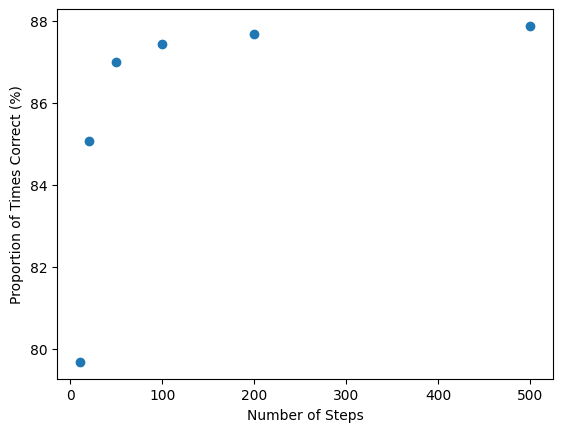

In [ ]:
num_steps = [10,20,50,100,200,500]
prop_correct = np.array([7968,8506,8701,8745,8769,8788])*100/10000

plt.scatter(num_steps, prop_correct)
plt.ylabel('Proportion of Times Correct (%)')
plt.xlabel('Number of Steps')



The plot above shows the increase in correct outcomes as the network becomes deeper.

**2. d) [2 marks]**  Try improving the model by adjusting the amount of inhibition (-0.9) and the amount of excitation (1).  Can you improve the proportion of time the model produces the correction output?  To simplify your experimentation, keep the number of timesteps as 20.

In [ ]:

#i/e = -2 and 1 gives corret 0.8529
#-1.1. 8608
w0 = np.zeros((N,N))
w0[:] = -0.9   # set the inhibition amount everywhere
for i in range(N):
    w0[i,i] = 1 # set the excitatory connection


import scipy


#scipy.optimize.minimize(min, [inh, exc],args = (inh, exc) )

X = dataset[:][0]


correct = 0
count1 = 0
count2 = 0

for input_values in X:
    count1+=1

    #print(1)
    #print(input_values)
    record = []                   # for recording the activity values
    activity = np.zeros(N)        # neurons are not active initially

    for i in range(20):
          #print(input_values)#[i].numpy())#[i])
          # the new neuron value is the old value times the weight matrix (for the neurons
          #  inhibiting and exciting each other), plus the input benig added.
          # we also clip the neurons so their activity doesn't go below 0 or above 1

          activity = np.clip(input_values.numpy() + w0 @ activity, 0, 1)
          record.append(activity)
    target = np.zeros(N)
    target[np.argmax(input_values)] = 1
    if np.all(target == activity):
      correct += 1
    count2+=1

print(correct)

min = 10000 - correct
#print(min)


The most improvement I was able to obtain was changing inhibitory and excitatory weights to -1.1 and 1 respectively, obtaining an improvement from 85.06% to 86.08%.

# 3. Action Selection with Winner-Take-All and a Synapse

We are now going to add a biological detail to the Winner-Take-All system.  In biology, when there is a connection between neurons, there is a synapse, and the activity of that synapse decays slowly over time.  This means that when a spike occurs, the input into the next neuron will suddenly increase, and then slowly decrease.

Here we will make a simple approximation of this process.  We will be implementing this as a *low-pass filter*.  The only parameter is the one that controls how quickly the synaptic activity will decay, and we will call this `tau`.  To implement a low-pass filter as part of our neuron model, we can compute the synaptic activity as follows, where `dt` is how long one timestep is in our model:

```python
alpha = 1-np.exp(-dt/tau)

activity_syn = activity_syn + alpha * (activity - activity_syn)
```

Here is what that would look like for a single input that gave a single spike on the 5th timestep, where each timestep is 0.001 seconds and the synaptic time constant is 0.01 seconds (10 milliseconds):



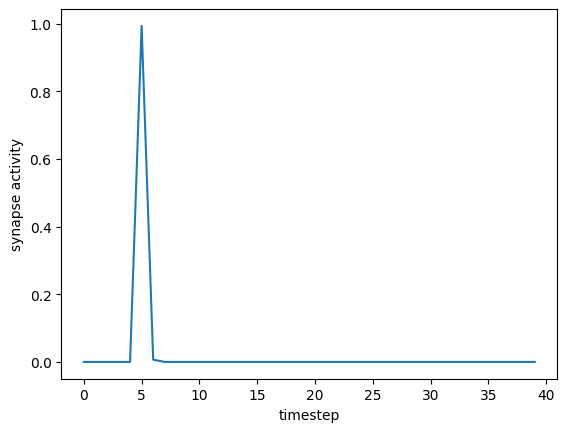

In [ ]:
activity - np.zeros(1)
activity_syn = np.zeros(1)

dt = 0.05    # length of a timestep
tau = 0.010   # time constant for the synapse
alpha = 1-np.exp(-dt/tau)
record = []
for i in range(40):
    activity = 0
    if i == 5:
        activity = 1
    activity_syn = activity_syn + alpha * (activity - activity_syn)
    record.append(activity_syn)

import matplotlib.pyplot as plt
plt.plot(record)
plt.xlabel('timestep')
plt.ylabel('synapse activity')
plt.show()

While our winner-take-all model is not spiking, we can still add this synapse model to the system.  This would be done as follows:

In [ ]:
record = []
activity = np.zeros(N)        # the raw output from the neuron
activity_syn = np.zeros(N)    # the output from the synapse
for i in range(20):
    activity = np.clip(input_values.numpy()  + w @ activity_syn, 0, 1)  # note we use activity_syn here, not activity
    activity_syn += alpha * (activity - activity_syn)          # implement the synapse

    record.append(activity_syn)


**3. a) [1 mark]** Test the winner-take-all model with a synapse time constant of 10 milliseconds, inhibition of -0.9, and excitation of 1 against all the data in `X`, running it for 20 timesteps (with each timestep being 1 millisecond).  What proportion of time does it get the correct answer?  Repeat this for differet synapse time constants (try 0.001, 0.002, 0.005, 0.01, and 0.02 seconds) and generate a plot showing the accuracy as you change the time constant.


In [ ]:
w = np.zeros((N,N))
w[:] = -0.9   # set the inhibition amount everywhere
for i in range(N):
    w[i,i] = 1   # set the excitatory connection

print(w)


X = dataset[:][0]
print(X[0])
print(X[1])
print(X[2])

print(X[9999])

correct = 0
count1 = 0
count2 = 0

for input_values in X:
    count1+=1

    #print(1)
    #print(input_values)
    #record = []                   # for recording the activity values
    #activity = np.zeros(N)        # neurons are not active initially

    #for i in range(20):
          #print(input_values)#[i].numpy())#[i])
          # the new neuron value is the old value times the weight matrix (for the neurons
          #  inhibiting and exciting each other), plus the input benig added.
          # we also clip the neurons so their activity doesn't go below 0 or above 1

     #     activity = np.clip(input_values.numpy() + w @ activity, 0, 1)
      #    record.append(activity)


    record = []
    activity = np.zeros(N)        # the raw output from the neuron
    activity_syn = np.zeros(N)    # the output from the synapse
    for i in range(20):
        activity = np.clip(input_values.numpy()  + w @ activity_syn, 0, 1)  # note we use activity_syn here, not activity
        activity_syn += alpha * (activity - activity_syn)          # implement the synapse

        record.append(activity_syn)






    target = np.zeros(N)
    target[np.argmax(input_values)] = 1
    if np.all(target == activity):
      correct += 1
    count2+=1

print(correct)

[[ 1.  -0.9 -0.9 -0.9]
 [-0.9  1.  -0.9 -0.9]
 [-0.9 -0.9  1.  -0.9]
 [-0.9 -0.9 -0.9  1. ]]
tensor([0.1087, 0.3220, 0.0878, 0.6010])
tensor([0.8288, 0.5304, 0.3239, 0.8163])
tensor([0.7792, 0.5475, 0.5276, 0.4146])
tensor([0.3720, 0.1576, 0.7617, 0.2750])
8503


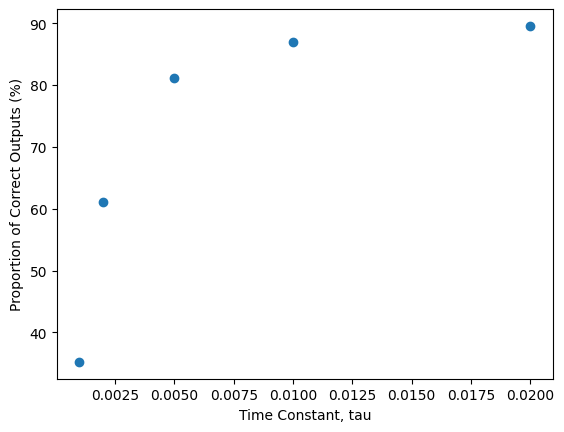

In [ ]:
time_constant = [0.001, 0.002, 0.005, 0.01, 0.02]
prop_correct = np.array([3523,6116,8111,8699,8955])*100/10000
[3577,6137,8144,8760,9005]
plt.scatter(time_constant, prop_correct)
plt.xlabel('Time Constant, tau')
plt.ylabel('Proportion of Correct Outputs (%)')
plt.show()

**3. b) [2 marks]** Try improving the model by adjusting the synaptic time constant, the amount of inhibition and the amount of excitation.  Can you improve the proportion of time the model produces the correct output?  To simplify your experimentation, keep the number of timesteps as 20.  As a hint, you should be able to get the model close to 99% accuracy!  This is an example of adding a biological detail to a model and having it improve its performance.


[[ 1.  -1.2 -1.2 -1.2]
 [-1.2  1.  -1.2 -1.2]
 [-1.2 -1.2  1.  -1.2]
 [-1.2 -1.2 -1.2  1. ]]


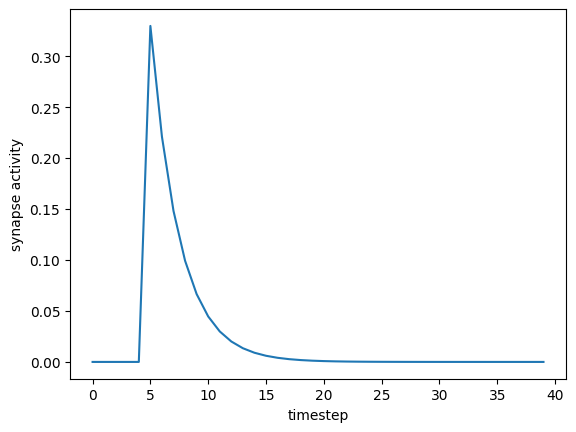

tensor([0.1087, 0.3220, 0.0878, 0.6010])
tensor([0.8288, 0.5304, 0.3239, 0.8163])
tensor([0.7792, 0.5475, 0.5276, 0.4146])
tensor([0.3720, 0.1576, 0.7617, 0.2750])
9903


In [ ]:
w = np.zeros((N,N))
w[:] = -1.2   # set the inhibition amount everywhere
for i in range(N):
    w[i,i] = 1   # set the excitatory connection

print(w)

activity - np.zeros(1)
activity_syn = np.zeros(1)

dt = 0.02    # length of a timestep
tau = 0.05   # time constant for the synapse
alpha = 1-np.exp(-dt/tau)
record = []


for i in range(40):
    activity = 0
    if i == 5:
        activity = 1
    activity_syn = activity_syn + alpha * (activity - activity_syn)
    record.append(activity_syn)

import matplotlib.pyplot as plt
plt.plot(record)
plt.xlabel('timestep')
plt.ylabel('synapse activity')
plt.show()

X = dataset[:][0]
print(X[0])
print(X[1])
print(X[2])

print(X[9999])

correct = 0
count1 = 0
count2 = 0

for input_values in X:
    count1+=1


    record = []
    activity = np.zeros(N)        # the raw output from the neuron
    activity_syn = np.zeros(N)    # the output from the synapse
    for i in range(20):
        activity = np.clip(input_values.numpy()  + w @ activity_syn, 0, 1)  # note we use activity_syn here, not activity
        activity_syn += alpha * (activity - activity_syn)          # implement the synapse

        record.append(activity_syn)






    target = np.zeros(N)
    target[np.argmax(input_values)] = 1
    if np.all(target == activity):
      correct += 1
    count2+=1

print(correct)

Upon changing the following parameters:


* tau, the synaptic time constant: 0.05 seconds
* inhibitory constant: -1.2
* excitatory constant: kept at 1,

We arrive at a correct output 99.03% of the time!

I found that increasing the tau value was the most instrumental in this synaptic model's success as previously testing these weights in a non-biological model (question 2d) did not approach these levels of accuracy.
